In [6]:
 !pip install pillow

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import joblib
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from sklearn.metrics import roc_curve, auc
from PIL import Image

In [8]:
# from google.colab import drive
# drive.mount("/content/drive")

In [9]:
datagen = ImageDataGenerator(
    rotation_range=180,
    fill_mode='nearest',
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.4,0.9],

)

In [10]:
dataset_path='./snakes_dataset'

In [11]:
import PIL
print(PIL.__version__)


10.0.1


In [12]:
name_of_label = os.listdir(f"{dataset_path}/")
print(name_of_label)

['coronella_images', 'natrix_images', 'vipera_images']


In [13]:
from PIL import Image
images = []
labels = []

name_of_label = os.listdir(f"{dataset_path}/")
print(name_of_label)
for co,i in enumerate(name_of_label):
    print(f"{dataset_path}/{i}")
    for j in os.listdir(f"{dataset_path}/{i}"):
        # print(f"{dataset_path}/{i}/{j}")
        loard_image = img_to_array(load_img(f"{dataset_path}/{i}/{j}", target_size=(224, 224)))
      

        #images.append(loard_image)
        #labels.append(co)
        # image Gen
        aug_iter = datagen.flow(np.expand_dims(loard_image, axis=0), batch_size=1)
        for h in range(6):
            image = next(aug_iter)[0].astype('uint8')
            images.append(image)
            labels.append(co)

images = np.array(images)
labels = np.array(labels)

['coronella_images', 'natrix_images', 'vipera_images']
./snakes_dataset/coronella_images
./snakes_dataset/natrix_images
./snakes_dataset/vipera_images


In [14]:
   !pip install pillow
   

In [15]:
# images = []
# labels = []

# name_of_label = os.listdir(f"{dataset_path}/")
# for co,i in enumerate(name_of_label):
#     for j in os.listdir(f"{dataset_path}/{i}"):
#         # print(f"{dataset_path}/{i}/{j}")
#         loard_image = img_to_array(load_img(f"{dataset_path}/{i}/{j}", target_size=(224, 224))).astype('uint8')

#         images.append(loard_image)
#         labels.append(co)

# images = np.array(images)
# labels = np.array(labels)


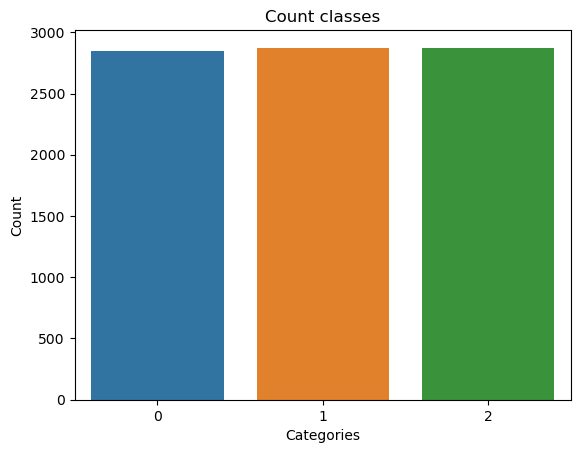

In [16]:
# Create a countplot
sns.countplot(x=labels)

# Add labels and a title
plt.xlabel("Categories")
plt.ylabel("Count")
plt.title("Count classes")

# Show the plot
plt.show()

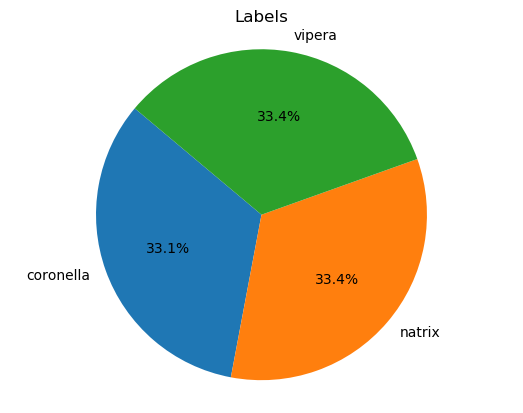

In [17]:
import numpy as np


unique_values, counts = np.unique(labels, return_counts=True)

# Create a dictionary from unique values and counts
data = dict(zip(unique_values, counts))

labels_ = [i.split("_")[0] for i in name_of_label]
sizes_ = list(data.values())

# Create a pie chart
plt.pie(sizes_, labels=labels_, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Labels')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [18]:
images.shape

(8598, 224, 224, 3)

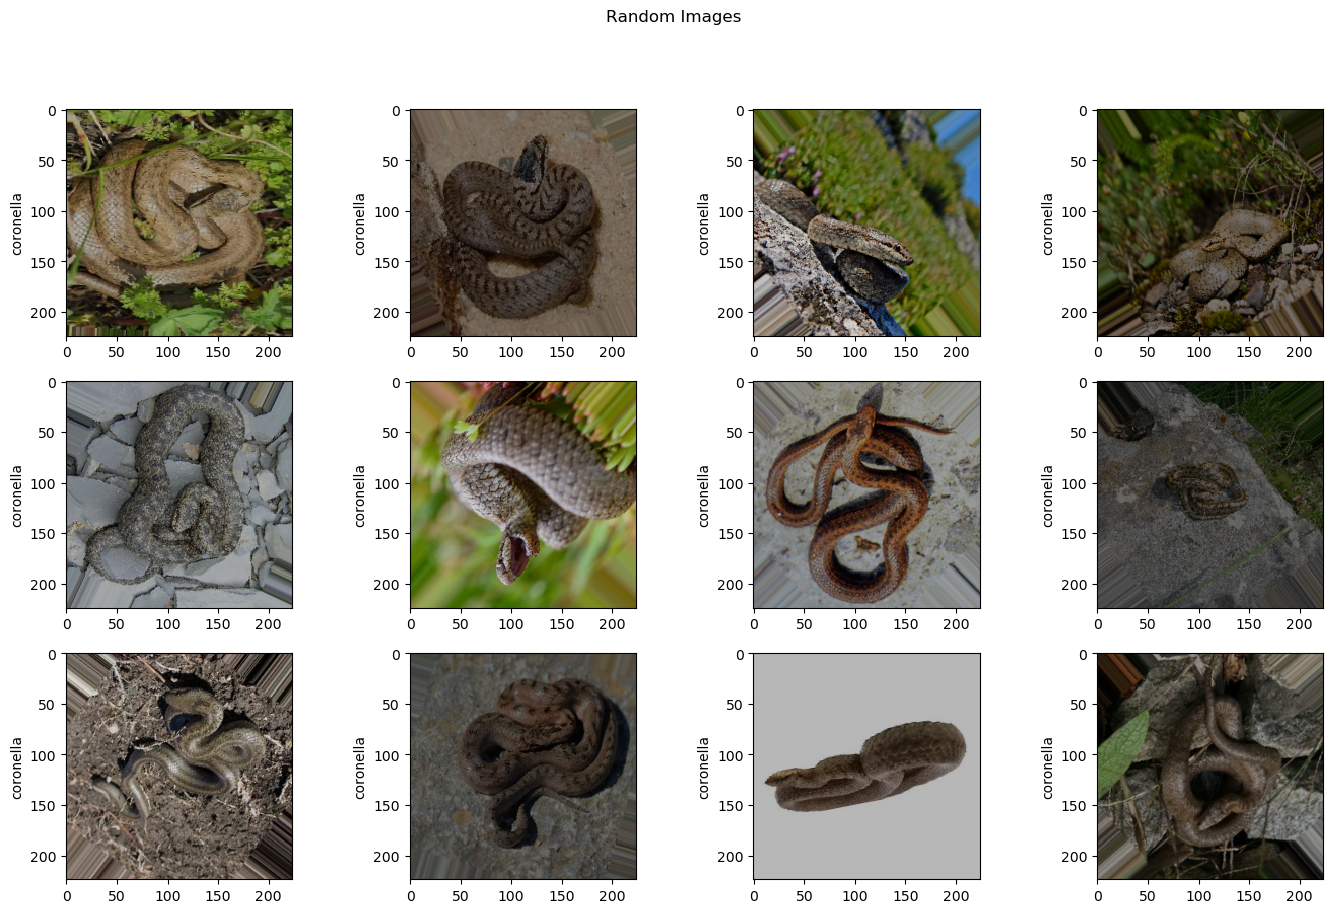

In [19]:
plt.figure(figsize=(17,10))

for i, random_number in enumerate(random.sample(range(0, 1432), 12)):
    plt.subplot(3,4,i+1)
    plt.imshow(images[random_number])
    plt.ylabel(name_of_label[labels[random_number]].split("_")[0])
plt.suptitle("Random Images")
plt.show()


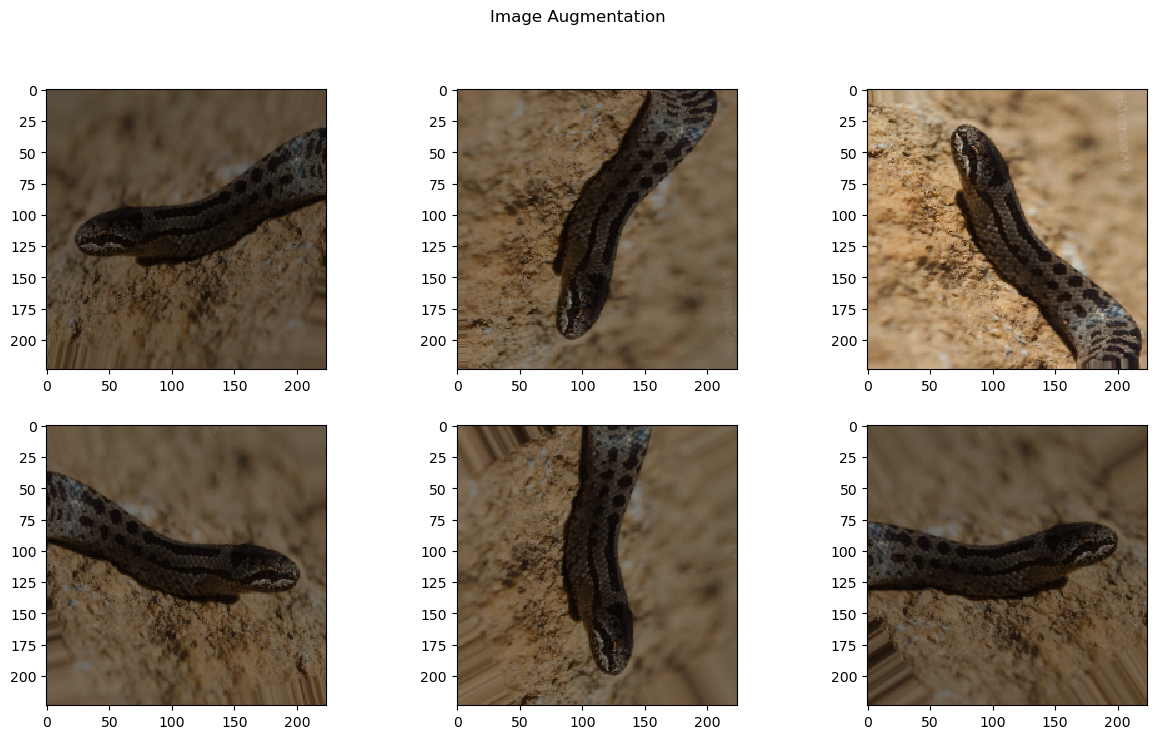

In [20]:
plt.figure(figsize=(15,8))

for i in range(6,12):
    plt.subplot(2,3,i+1-6)
    plt.imshow(images[i])
plt.suptitle("Image Augmentation")
plt.show()

In [21]:
x_train,x_test,y_train,y_test = train_test_split(images,labels,test_size=0.20,random_state=42)

## **MODEL 1 CNN**

In [80]:
model = Sequential()

model.add(layers.Rescaling(1.0 / 255.0, input_shape=(224, 224, 3)))

# Convolutional layers
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output for the fully connected layers
model.add(layers.Flatten())

# Fully connected layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))

# Output layer with 3 classes and softmax activation
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use categorical cross-entropy for multi-class classification
              metrics=['accuracy'])

# Display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0

In [85]:
history = model.fit(x_train, to_categorical(y_train), epochs=50, batch_size=64, validation_data=(x_test, to_categorical(y_test)))

Epoch 1/50
108/108 [==============================] - 148s 1s/step - loss: 0.9474 - accuracy: 0.5342 - val_loss: 0.9866 - val_accuracy: 0.4983
Epoch 2/50
108/108 [==============================] - 147s 1s/step - loss: 0.8395 - accuracy: 0.6262 - val_loss: 0.8139 - val_accuracy: 0.6378
Epoch 3/50
108/108 [==============================] - 147s 1s/step - loss: 0.7882 - accuracy: 0.6479 - val_loss: 0.8277 - val_accuracy: 0.6384
Epoch 4/50
108/108 [==============================] - 147s 1s/step - loss: 0.7295 - accuracy: 0.6845 - val_loss: 0.8182 - val_accuracy: 0.6448
Epoch 5/50
108/108 [==============================] - 147s 1s/step - loss: 0.6704 - accuracy: 0.7143 - val_loss: 0.7666 - val_accuracy: 0.6640
Epoch 6/50
108/108 [==============================] - 147s 1s/step - loss: 0.5861 - accuracy: 0.7573 - val_loss: 0.6836 - val_accuracy: 0.7157
Epoch 7/50
108/108 [==============================] - 146s 1s/step - loss: 0.5049 - accuracy: 0.7965 - val_loss: 0.6775 - val_accuracy: 0.7244

In [91]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
# Save TensorFlow Lite model
with open('./snakes_recognition_output/CNN.tflite', 'wb') as f:
    f.write(tflite_model)



INFO:tensorflow:Assets written to: C:\Users\imran\AppData\Local\Temp\tmpverkso7u\assets


INFO:tensorflow:Assets written to: C:\Users\imran\AppData\Local\Temp\tmpverkso7u\assets


In [99]:
model.save('./snakes_recognition_output/CNN.h5')
history_dict = {
    'loss': history.history['loss'],
    'val_loss': history.history['val_loss'],
    'accuracy': history.history['accuracy'],
    'val_accuracy': history.history['val_accuracy']
}

joblib.dump(history_dict, './snakes_recognition_output/CNN_history.pkl')


['./snakes_recognition_output/CNN_history.pkl']

In [103]:
model = tf.keras.models.load_model('./snakes_recognition_output/CNN.h5')
history = joblib.load('./snakes_recognition_output/CNN_history.pkl')

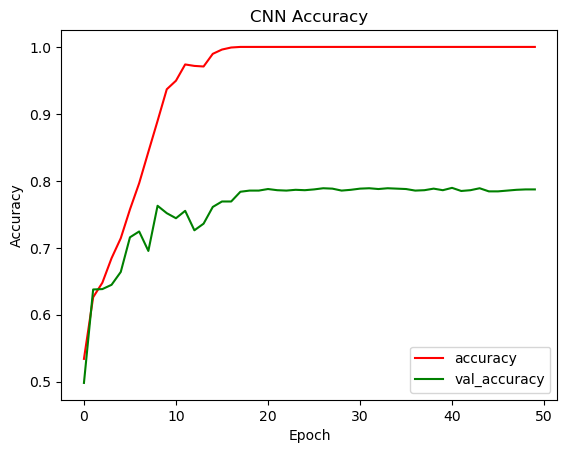

In [107]:
plt.plot(range(len(history_dict['accuracy'])), history_dict['accuracy'], color='red', label='accuracy')
plt.plot(range(len(history_dict['val_accuracy'])), history_dict['val_accuracy'], color='green', label='val_accuracy')
plt.title("CNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

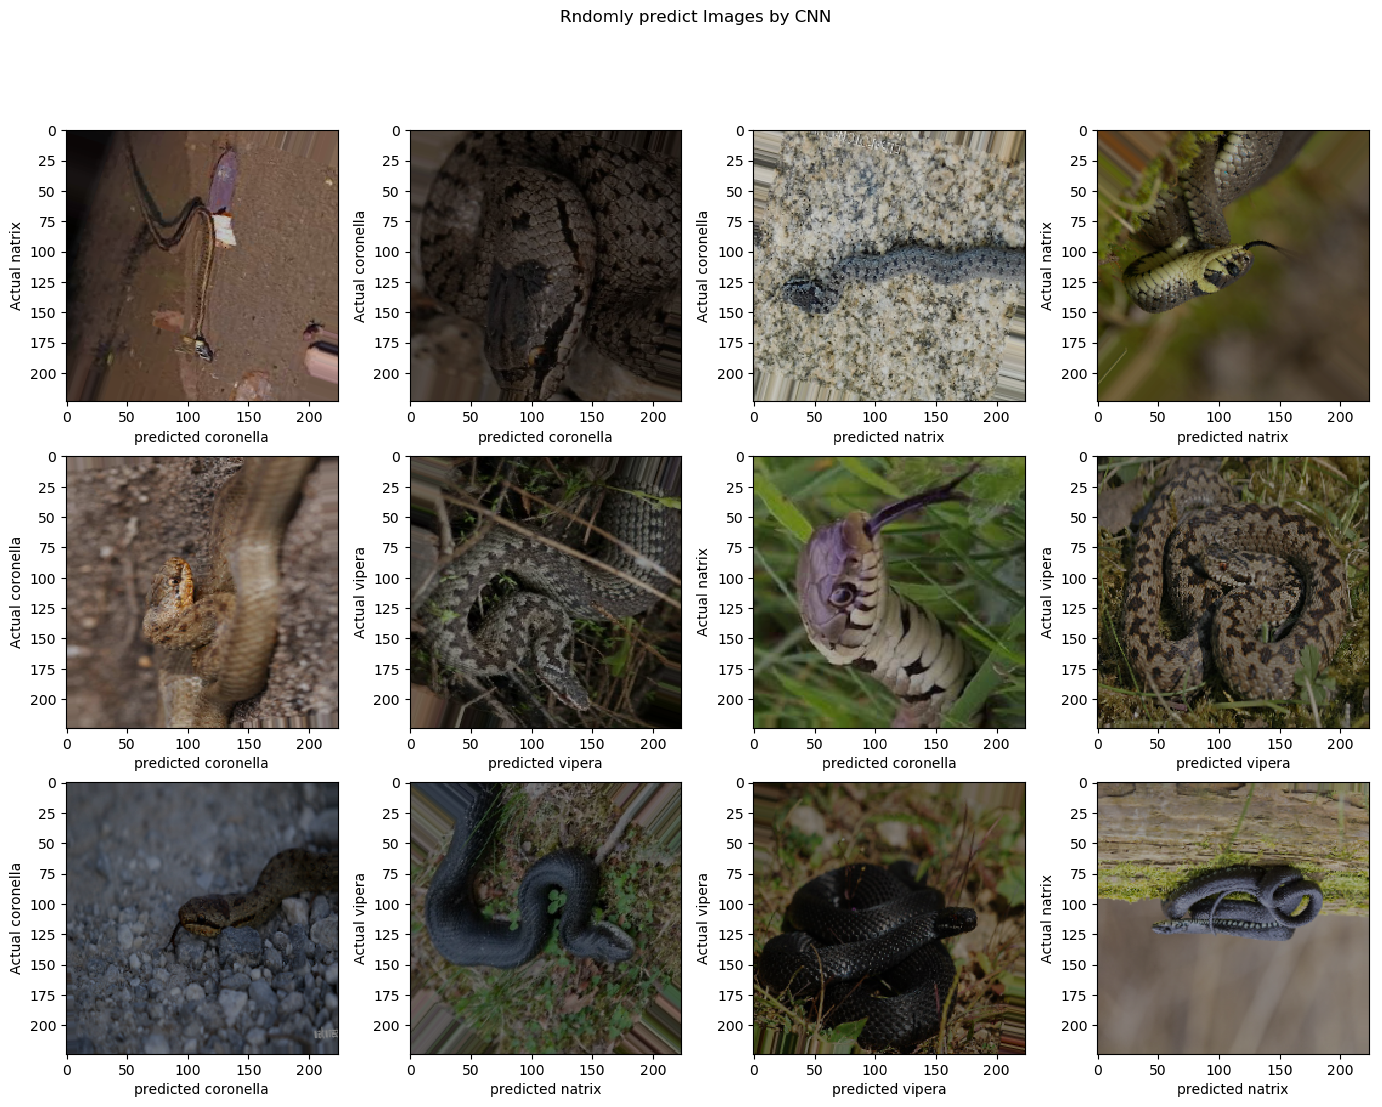

In [109]:
plt.figure(figsize=(17,12))

for i,random_number in enumerate(random.sample(range(0, 287), 12)):
    plt.subplot(3,4,i+1)
    plt.imshow(x_test[random_number])

    normalized_image = np.expand_dims(x_test[random_number], axis=0)
    predictions = model.predict(normalized_image)

    plt.ylabel(f'Actual {name_of_label[y_test[random_number]].split("_")[0]}')
    plt.xlabel(f'predicted {name_of_label[np.argmax(predictions)].split("_")[0]}')

plt.suptitle("Rndomly predict Images by CNN")
plt.show()

In [116]:
y_pre_0 = []
for i in model.predict(x_test):
    y_pre_0.append(np.argmax(i))
y_pre_0 = np.array(y_pre_0)

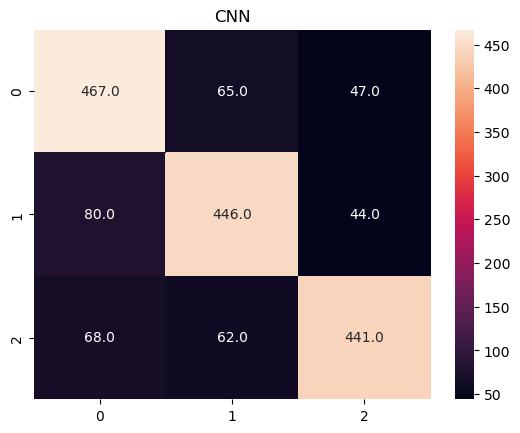

In [117]:
sns.heatmap(confusion_matrix(y_test, y_pre_0),annot=True,fmt=".1f")
plt.title("CNN")
plt.show()

In [118]:
accuracy = accuracy_score(y_test, y_pre_0)
accuracy

0.7872093023255814

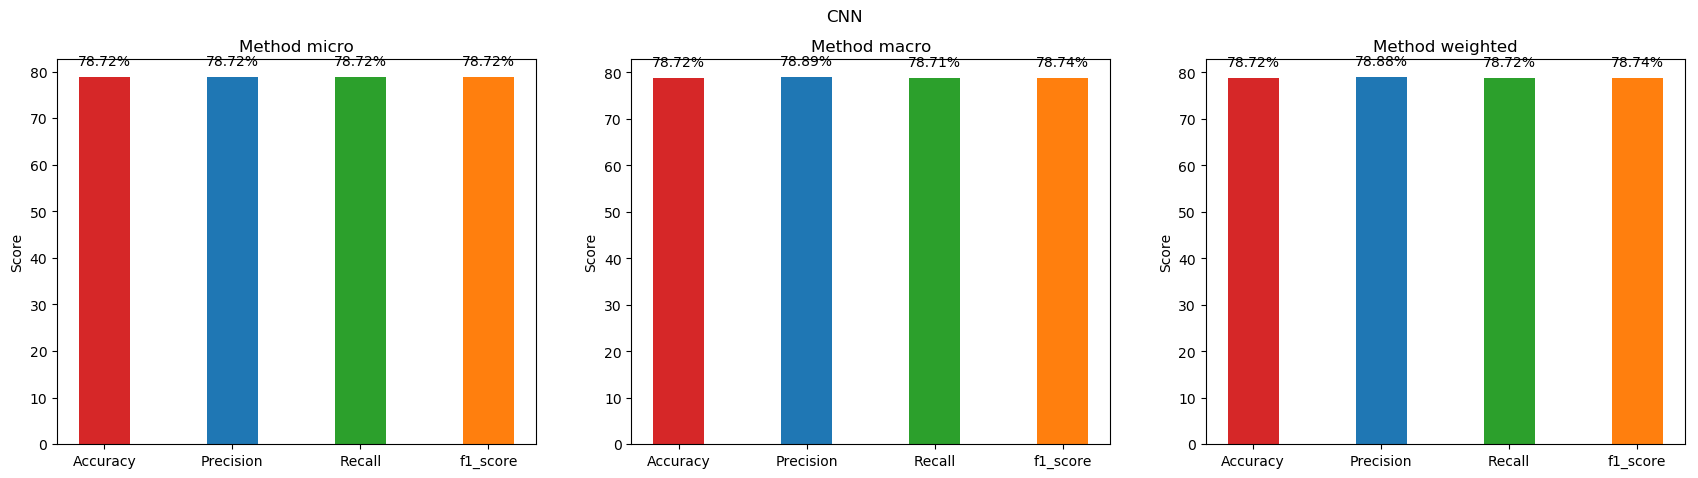

In [122]:
type_ = ['micro','macro','weighted']
plt.figure(figsize=(21,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    data = {"Accuracy": accuracy_score(y_test, y_pre_0)*100,
        'Precision': precision_score(y_test, y_pre_0, average=type_[i])*100,
            'Recall':recall_score(y_test, y_pre_0, average=type_[i])*100,
            "f1_score": f1_score(y_test, y_pre_0, average=type_[i])*100}
    courses = list(data.keys())
    values = list(data.values())
    bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']
    plt.bar(courses, values, color=bar_colors,
            width = 0.4)
    for j, v in enumerate(values):
        plt.text(j, v + 2, f'{round(v, 2)}%', ha='center', va='bottom')

    plt.ylabel("Score")
    plt.title(f"Method {type_[i]}")
plt.suptitle("CNN")
plt.show()

## MODEL 2 Xception

In [135]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Create an input layer with image normalization
input_layer = layers.Input(shape=(224, 224, 3))
normalized_input = layers.Rescaling(1./255)(input_layer)  # Normalize pixel values between 0 and 1

# Connect the input layer to the base model
x = base_model(normalized_input)

# Add a new output layer
x = layers.Flatten()(x)
output = layers.Dense(3, activation='softmax')(x)

# Create the new model
model_2 = Model(input_layer, output)

# Compile the model
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [136]:
model_2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 301059    
Total params: 21,162,539
Trainable params: 301,059
Non-trainable params: 20,861,480
_________________________________________________________________


In [139]:
history_2 = model_2.fit(x_train, to_categorical(y_train), epochs=15, batch_size=64, validation_data=(x_test, to_categorical(y_test)))

Epoch 1/15
108/108 [==============================] - 679s 6s/step - loss: 1.7672 - accuracy: 0.7581 - val_loss: 1.2855 - val_accuracy: 0.7884
Epoch 2/15
108/108 [==============================] - 665s 6s/step - loss: 0.6116 - accuracy: 0.8751 - val_loss: 0.9493 - val_accuracy: 0.8424
Epoch 3/15
108/108 [==============================] - 662s 6s/step - loss: 0.2544 - accuracy: 0.9327 - val_loss: 0.6290 - val_accuracy: 0.8802
Epoch 4/15
108/108 [==============================] - 658s 6s/step - loss: 0.1836 - accuracy: 0.9446 - val_loss: 0.6947 - val_accuracy: 0.8744
Epoch 5/15
108/108 [==============================] - 658s 6s/step - loss: 0.1443 - accuracy: 0.9567 - val_loss: 0.6971 - val_accuracy: 0.8930
Epoch 6/15
108/108 [==============================] - 659s 6s/step - loss: 0.0681 - accuracy: 0.9778 - val_loss: 0.6413 - val_accuracy: 0.8942
Epoch 7/15
108/108 [==============================] - 664s 6s/step - loss: 0.0568 - accuracy: 0.9828 - val_loss: 0.7767 - val_accuracy: 0.8733

In [147]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
tflite_model = converter.convert()
# Save TensorFlow Lite model
with open('./snakes_recognition_output/Xception.tflite', 'wb') as f:
    f.write(tflite_model)



INFO:tensorflow:Assets written to: C:\Users\imran\AppData\Local\Temp\tmpy3aoit59\assets


INFO:tensorflow:Assets written to: C:\Users\imran\AppData\Local\Temp\tmpy3aoit59\assets
C:\Users\imran\.conda\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [158]:
model_2.save('./snakes_recognition_output/Xception.h5')
history_dict2 = {
    'loss': history_2.history['loss'],
    'val_loss': history_2.history['val_loss'],
    'accuracy': history_2.history['accuracy'],
    'val_accuracy': history_2.history['val_accuracy']
}

joblib.dump(history_dict2, './snakes_recognition_output/Xception_history.pkl')

['./snakes_recognition_output/Xception_history.pkl']

In [170]:
model_2 = tf.keras.models.load_model('./snakes_recognition_output/Xception.h5')
history_2 = joblib.load('./snakes_recognition_output/Xception_history.pkl')

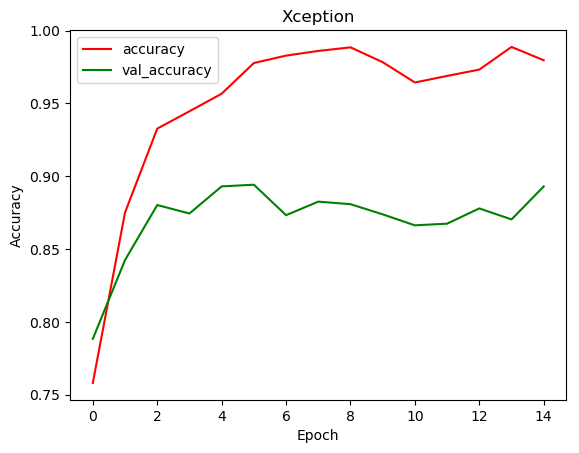

In [175]:
plt.plot(range(len(history_2['accuracy'])), history_2['accuracy'], color='red', label='accuracy')
plt.plot(range(len(history_2['val_accuracy'])), history_2['val_accuracy'], color='green', label='val_accuracy')
plt.title("Xception")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

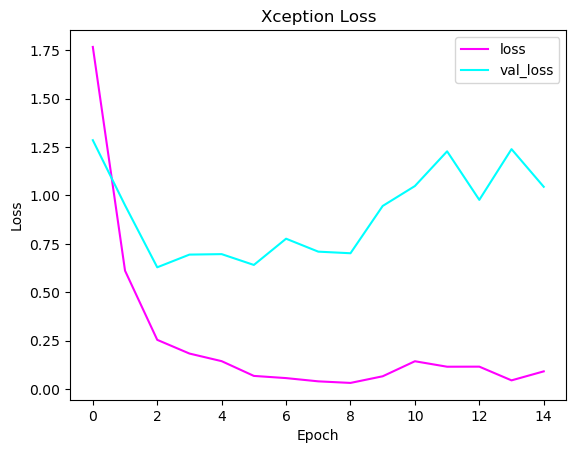

In [179]:
plt.plot(range(len(history_2['loss'])), history_2['loss'], color='magenta', label='loss')
plt.plot(range(len(history_2['val_loss'])), history_2['val_loss'], color='cyan', label='val_loss')
plt.title("Xception Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

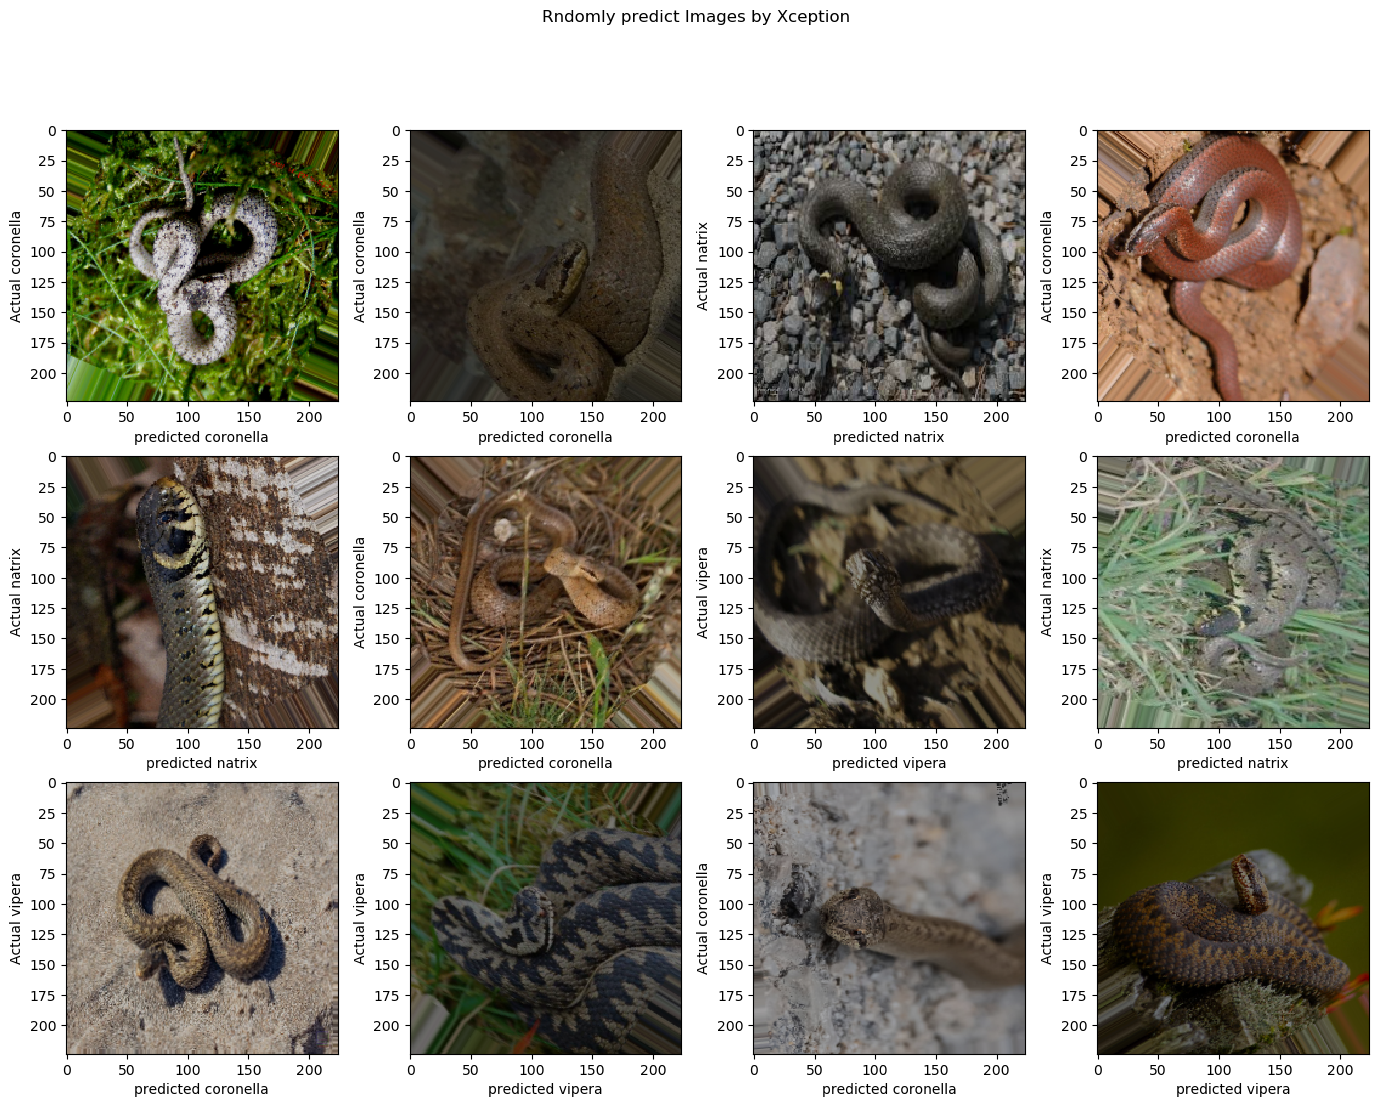

In [181]:
plt.figure(figsize=(17,12))

for i,random_number in enumerate(random.sample(range(0, 295 ), 12)):
    plt.subplot(3,4,i+1)
    plt.imshow(x_test[random_number])

    normalized_image = np.expand_dims(x_test[random_number], axis=0)
    predictions = model_2.predict(normalized_image)

    plt.ylabel(f'Actual {name_of_label[y_test[random_number]].split("_")[0]}')
    plt.xlabel(f'predicted {name_of_label[np.argmax(predictions)].split("_")[0]}')

plt.suptitle("Rndomly predict Images by Xception")
plt.show()

In [182]:
y_pre_2 = []
for i in model_2.predict(x_test):
    y_pre_2.append(np.argmax(i))
y_pre_2 = np.array(y_pre_2)

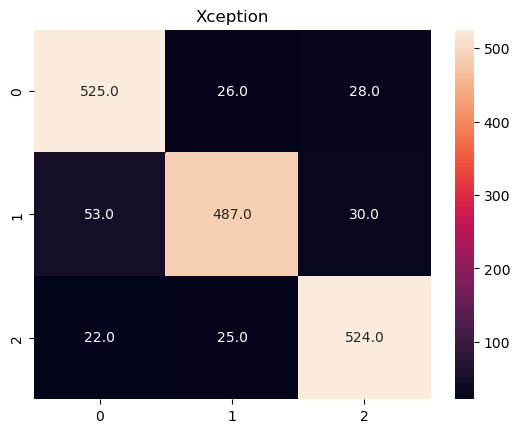

In [183]:
sns.heatmap(confusion_matrix(y_test, y_pre_2),annot=True,fmt=".1f")
plt.title("Xception")
plt.show()

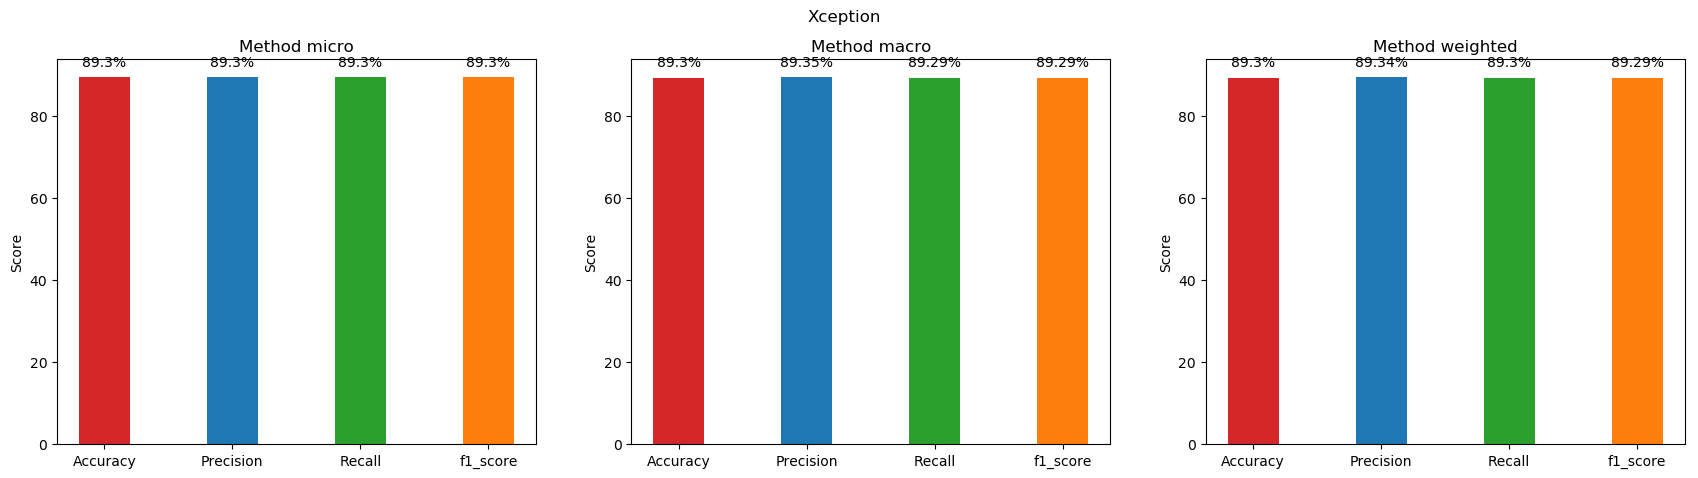

In [185]:
type_ = ['micro','macro','weighted']
plt.figure(figsize=(21,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    data = {"Accuracy": accuracy_score(y_test, y_pre_2)*100,
        'Precision': precision_score(y_test, y_pre_2, average=type_[i])*100,
            'Recall':recall_score(y_test, y_pre_2, average=type_[i])*100,
            "f1_score": f1_score(y_test, y_pre_2, average=type_[i])*100}
    courses = list(data.keys())
    values = list(data.values())
    bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']
    plt.bar(courses, values, color=bar_colors,
            width = 0.4)
    for j, v in enumerate(values):
        plt.text(j, v + 2, f'{round(v, 2)}%', ha='center', va='bottom')

    plt.ylabel("Score")
    plt.title(f"Method {type_[i]}")
plt.suptitle("Xception")
plt.show()

In [186]:
accuracy = accuracy_score(y_test, y_pre_2)
accuracy

0.8930232558139535

 # **Model 3 VGG16**

In [236]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Create an input layer with image normalization
input_layer = layers.Input(shape=(224, 224, 3))
normalized_input = layers.Rescaling(1./255)(input_layer)  # Normalize pixel values between 0 and 1

# Connect the input layer to the base model
x = base_model(normalized_input)

# Add a new output layer
x = layers.Flatten()(x)
output = layers.Dense(3, activation='softmax')(x)

# Create the new model
model_3 = Model(input_layer, output)

# Compile the model
model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

58900480/58889256 [==============================] - 11s 0us/step


In [237]:
model_3.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 75267     
Total params: 14,789,955
Trainable params: 75,267
Non-trainable params: 14,714,688
_________________________________________________________________


In [251]:
history_3 = model_3.fit(x_train, to_categorical(y_train), epochs=20, batch_size=64, validation_data=(x_test, to_categorical(y_test)))

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_3)
tflite_model = converter.convert()
# Save TensorFlow Lite model
with open('./snakes_recognition_output/VGG16.tflite', 'wb') as f:
    f.write(tflite_model)



In [ ]:
model_3.save('./snakes_recognition_output/VGG16.h5')
joblib.dump(history_3, './snakes_recognition_output/VGG16_history.pkl')

In [ ]:
model_3 = tf.keras.models.load_model('./snakes_recognition_output/VGG16.h5')
history_3 = joblib.load('./snakes_recognition_output/VGG16_history.pkl')

In [ ]:
plt.plot([i for i in range(len(history_3.history['accuracy']))], history_3.history['accuracy'], color='red',label=f'accuracy')
plt.plot([i for i in range(len(history_3.history['val_accuracy']))], history_3.history['val_accuracy'], color='green',label=f'val_accuracy')
plt.legend()
plt.title("VGG16")
plt.show()

In [ ]:
plt.plot([i for i in range(len(history_3.history['loss']))], history_3.history['loss'], color='magenta',label=f'loss')
plt.plot([i for i in range(len(history_3.history['val_loss']))], history_3.history['val_loss'], color='c',label=f'val_loss')
plt.title("VGG16")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(17,12))

for i,random_number in enumerate(random.sample(range(0, 295), 12)):
    plt.subplot(3,4,i+1)
    plt.imshow(x_test[random_number])

    normalized_image = np.expand_dims(x_test[random_number], axis=0)
    predictions = model_3.predict(normalized_image)

    plt.ylabel(f'Actual {name_of_label[y_test[random_number]].split("_")[0]}')
    plt.xlabel(f'predicted {name_of_label[np.argmax(predictions)].split("_")[0]}')

plt.suptitle("Rndomly predict Images by VGG16")
plt.show()

In [ ]:
y_pre_3 = []
for i in model_3.predict(x_test):
    y_pre_3.append(np.argmax(i))
y_pre_3 = np.array(y_pre_3)

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pre_3),annot=True,fmt=".1f")
plt.title("VGG16")
plt.show()

In [ ]:
type_ = ['micro','macro','weighted']
plt.figure(figsize=(21,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    data = {"Accuracy": accuracy_score(y_test, y_pre_3)*100,
        'Precision': precision_score(y_test, y_pre_3, average=type_[i])*100,
            'Recall':recall_score(y_test, y_pre_3, average=type_[i])*100,
            "f1_score": f1_score(y_test, y_pre_3, average=type_[i])*100}
    courses = list(data.keys())
    values = list(data.values())
    bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']
    plt.bar(courses, values, color=bar_colors,
            width = 0.4)
    for j, v in enumerate(values):
        plt.text(j, v + 2, f'{round(v, 2)}%', ha='center', va='bottom')

    plt.ylabel("Score")
    plt.title(f"Method {type_[i]}")
plt.suptitle("VGG16")
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pre_3)
accuracy

# Model 4 ResNet50

In [63]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Create an input layer with image normalization
input_layer = layers.Input(shape=(224, 224, 3))
normalized_input = layers.Rescaling(1./255)(input_layer)  # Normalize pixel values between 0 and 1

# Connect the input layer to the base model
x = base_model(normalized_input)

# Add a new output layer
x = layers.Flatten()(x)
output = layers.Dense(3, activation='softmax')(x)

# Create the new model
model_4 = Model(input_layer, output)

# Compile the model
model_4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

94765736/94765736 [==============================] - 0s 0us/step


In [64]:
model_4.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling_3 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 100352)            0         
                                                                 
 dense_5 (Dense)             (None, 3)                 301059    
                                                                 
Total params: 23888771 (91.13 MB)
Trainable params: 301059 (1.15 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [65]:
history_4 = model_4.fit(x_train, to_categorical(y_train), epochs=20, batch_size=64, validation_data=(x_test, to_categorical(y_test)))

Epoch 1/20
18/18 [==============================] - 27s 1s/step - loss: 6.1490 - accuracy: 0.3135 - val_loss: 2.2734 - val_accuracy: 0.3275
Epoch 2/20
18/18 [==============================] - 23s 1s/step - loss: 1.5891 - accuracy: 0.3886 - val_loss: 0.9929 - val_accuracy: 0.4739
Epoch 3/20
18/18 [==============================] - 23s 1s/step - loss: 1.0230 - accuracy: 0.4943 - val_loss: 1.3417 - val_accuracy: 0.3380
Epoch 4/20
18/18 [==============================] - 24s 1s/step - loss: 0.9783 - accuracy: 0.5354 - val_loss: 1.0267 - val_accuracy: 0.4878
Epoch 5/20
18/18 [==============================] - 24s 1s/step - loss: 0.9864 - accuracy: 0.5459 - val_loss: 0.9535 - val_accuracy: 0.5122
Epoch 6/20
18/18 [==============================] - 24s 1s/step - loss: 0.8661 - accuracy: 0.5738 - val_loss: 0.9449 - val_accuracy: 0.5401
Epoch 7/20
18/18 [==============================] - 24s 1s/step - loss: 0.8519 - accuracy: 0.5983 - val_loss: 1.0350 - val_accuracy: 0.4913
Epoch 8/20
18/18 [==

In [66]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_4)
tflite_model = converter.convert()
# Save TensorFlow Lite model
with open('./snakes_recognition_output/ResNet50.tflite', 'wb') as f:
    f.write(tflite_model)



In [67]:
model_4.save('./snakes_recognition_output/ResNet50.h5')
joblib.dump(history_4, './snakes_recognition_output/ResNet50_history.pkl')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


['/content/drive/MyDrive/Colab Notebooks/snakes_recognition_output/ResNet50_history.pkl']

In [68]:
model_4 = tf.keras.models.load_model('./snakes_recognition_output/ResNet50.h5')
history_4 = joblib.load('./snakes_recognition_output/ResNet50_history.pkl')

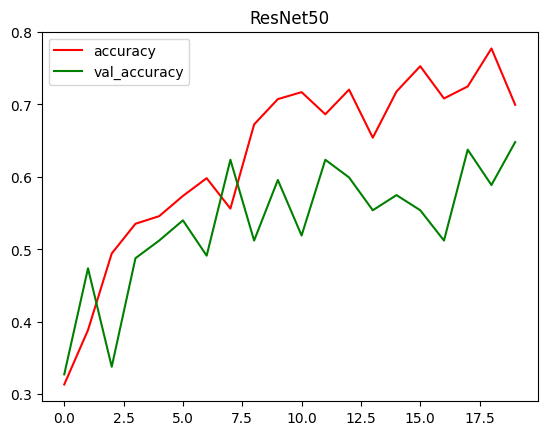

In [69]:
plt.plot([i for i in range(len(history_3.history['accuracy']))], history_4.history['accuracy'], color='red',label=f'accuracy')
plt.plot([i for i in range(len(history_3.history['val_accuracy']))], history_4.history['val_accuracy'], color='green',label=f'val_accuracy')
plt.legend()
plt.title("ResNet50")
plt.show()

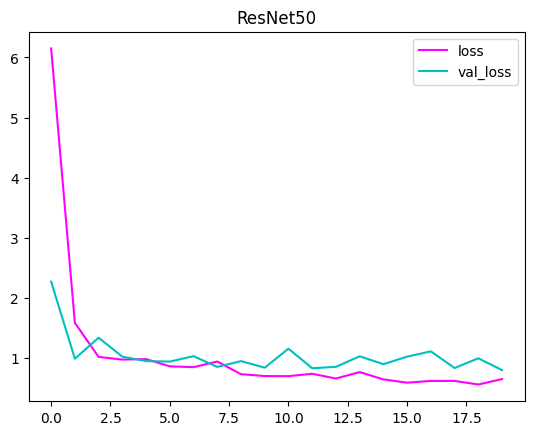

In [70]:
plt.plot([i for i in range(len(history_3.history['loss']))], history_4.history['loss'], color='magenta',label=f'loss')
plt.plot([i for i in range(len(history_3.history['val_loss']))], history_4.history['val_loss'], color='c',label=f'val_loss')
plt.title("ResNet50")
plt.legend()
plt.show()

1/1 [==============================] - 0s 85ms/step


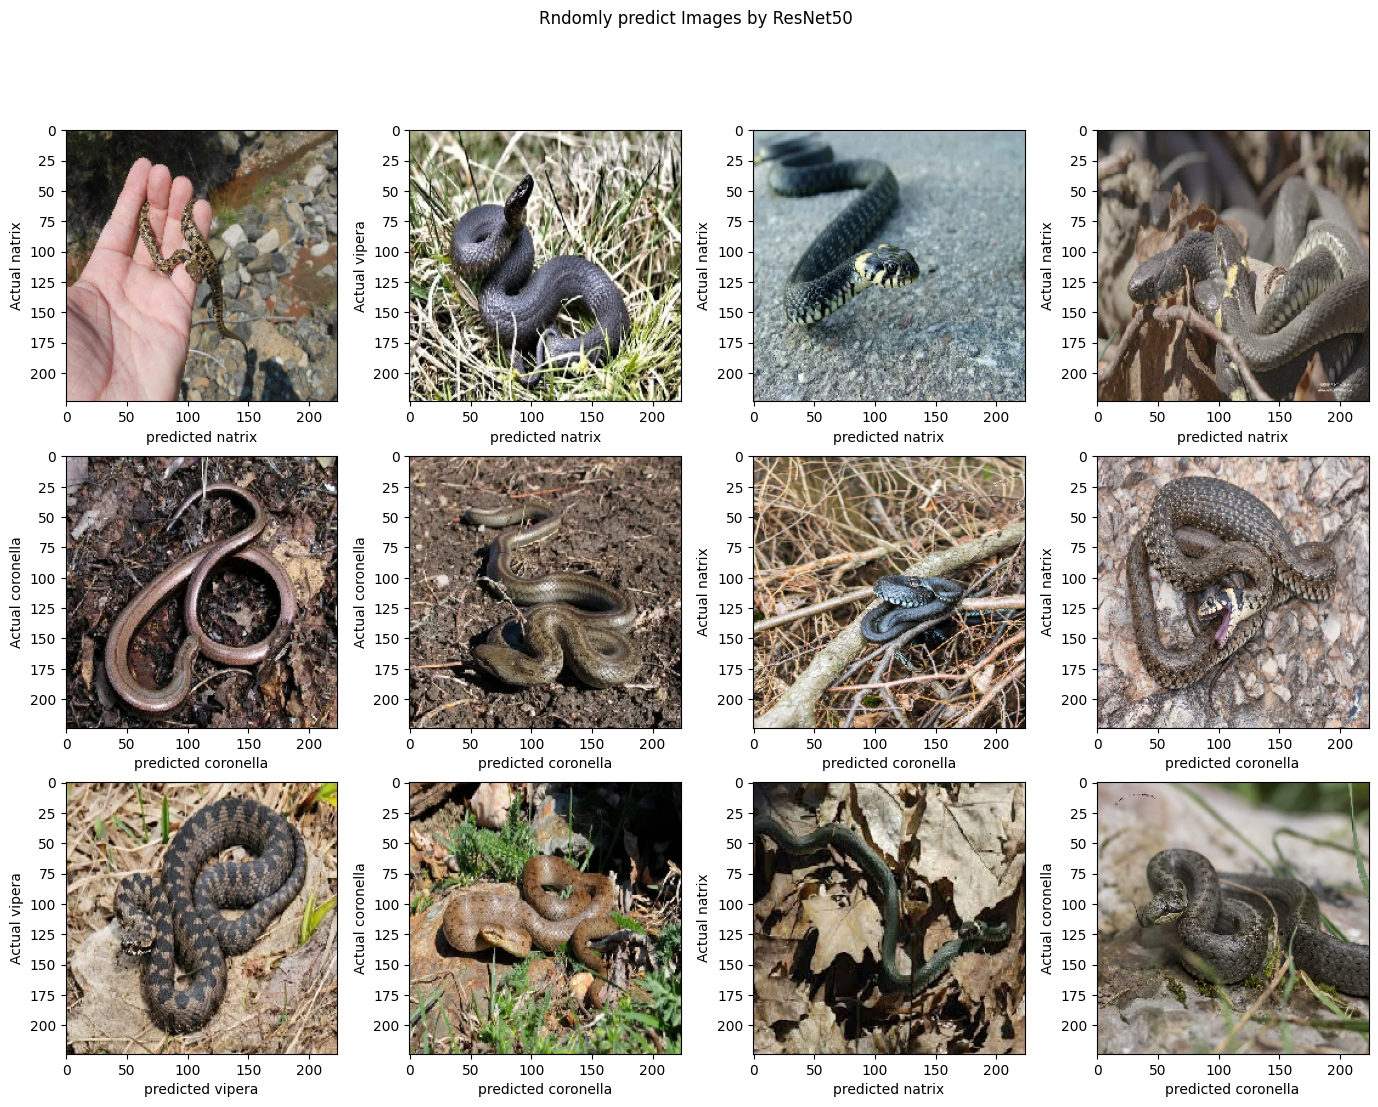

In [71]:
plt.figure(figsize=(17,12))

for i,random_number in enumerate(random.sample(range(0, 295), 12)):
    plt.subplot(3,4,i+1)
    plt.imshow(x_test[random_number])

    normalized_image = np.expand_dims(x_test[random_number], axis=0)
    predictions = model_4.predict(normalized_image)

    plt.ylabel(f'Actual {name_of_label[y_test[random_number]].split("_")[0]}')
    plt.xlabel(f'predicted {name_of_label[np.argmax(predictions)].split("_")[0]}')

plt.suptitle("Rndomly predict Images by ResNet50")
plt.show()

In [72]:
y_pre_4 = []
for i in model_4.predict(x_test):
    y_pre_4.append(np.argmax(i))
y_pre_4 = np.array(y_pre_4)

9/9 [==============================] - 5s 549ms/step


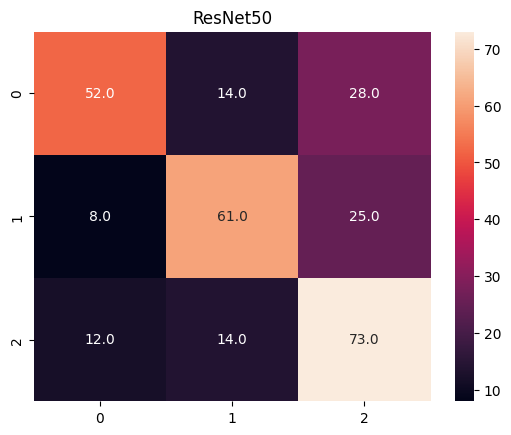

In [73]:
sns.heatmap(confusion_matrix(y_test, y_pre_4),annot=True,fmt=".1f")
plt.title("ResNet50")
plt.show()

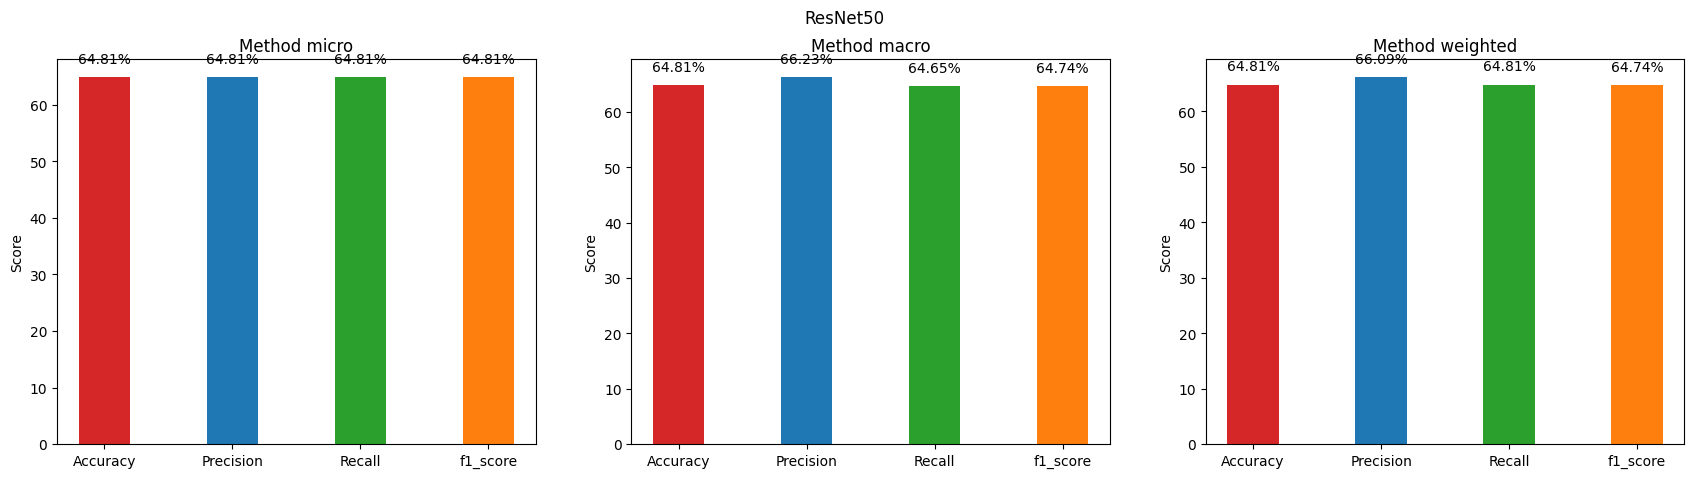

In [74]:
type_ = ['micro','macro','weighted']
plt.figure(figsize=(21,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    data = {"Accuracy": accuracy_score(y_test, y_pre_4)*100,
        'Precision': precision_score(y_test, y_pre_4, average=type_[i])*100,
            'Recall':recall_score(y_test, y_pre_4, average=type_[i])*100,
            "f1_score": f1_score(y_test, y_pre_4, average=type_[i])*100}
    courses = list(data.keys())
    values = list(data.values())
    bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']
    plt.bar(courses, values, color=bar_colors,
            width = 0.4)
    for j, v in enumerate(values):
        plt.text(j, v + 2, f'{round(v, 2)}%', ha='center', va='bottom')

    plt.ylabel("Score")
    plt.title(f"Method {type_[i]}")
plt.suptitle("ResNet50")
plt.show()

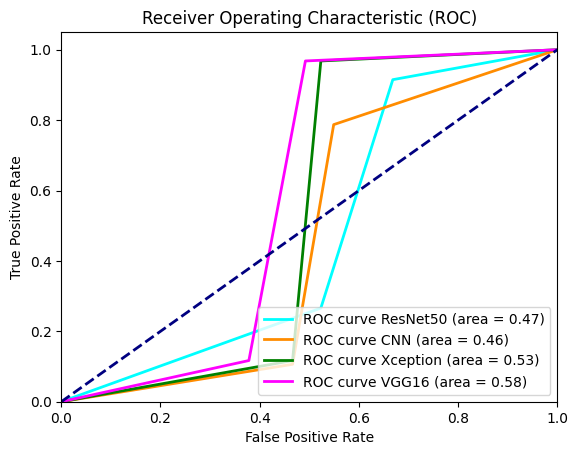

In [75]:
# Calculate ROC and AUC for each model
fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, y_pre_0, pos_label=1)
roc_auc_1 = auc(fpr_1, tpr_1)

fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, y_pre_2, pos_label=1)
roc_auc_2 = auc(fpr_2, tpr_2)

fpr_3, tpr_3, thresholds_3 = roc_curve(y_test, y_pre_3, pos_label=1)
roc_auc_3 = auc(fpr_3, tpr_3)

fpr_4, tpr_4, thresholds_4 = roc_curve(y_test, y_pre_4, pos_label=1)
roc_auc_4 = auc(fpr_4, tpr_4)

# Plot ROC curve
plt.figure()
plt.plot(fpr_4, tpr_4, color='cyan', lw=2, label=f'ROC curve ResNet50 (area = {roc_auc_4:.2f})')
plt.plot(fpr_1, tpr_1, color='darkorange', lw=2, label=f'ROC curve CNN (area = {roc_auc_1:.2f})')
plt.plot(fpr_2, tpr_2, color='green', lw=2, label=f'ROC curve Xception (area = {roc_auc_2:.2f})')
plt.plot(fpr_3, tpr_3, color='magenta', lw=2, label=f'ROC curve VGG16 (area = {roc_auc_3:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [76]:
accuracy = accuracy_score(y_test, y_pre_4)
accuracy

0.6480836236933798

# Output

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, mean_absolute_error, mean_squared_error
from keras.models import load_model
from sklearn.model_selection import train_test_split
import numpy as np

# Load models
model_1 = load_model('./snakes_recognition_output/CNN.h5')
model_2 = load_model('./snakes_recognition_output/Xception.h5')
# model_3 = load_model('./snakes_recognition_output/VGG16.h5')
# model_4 = load_model('./snakes_recognition_output/ResNet50.h5')



In [23]:
# Make predictions
y_pred_1 = model_1.predict(x_test)



In [ ]:
y_pred_2 = model_2.predict(x_test)
# y_pred_3 = model_3.predict(x_test)
# y_pred_4 = model_4.predict(x_test)


In [ ]:
# Convert probabilities to labels (assuming binary classification)
y_pred_1 = np.argmax(y_pred_1, axis=1)
y_pred_2 = np.argmax(y_pred_2, axis=1)
# y_pred_3 = np.argmax(y_pred_3, axis=1)
# y_pred_4 = np.argmax(y_pred_4, axis=1)

In [ ]:
# Calculate metrics
accuracy_1 = accuracy_score(y_test, y_pred_1)
accuracy_2 = accuracy_score(y_test, y_pred_2)
# accuracy_3 = accuracy_score(y_test, y_pred_3)
# accuracy_4 = accuracy_score(y_test, y_pred_4)



In [ ]:
precision_1 = precision_score(y_test, y_pred_1,average='micro')
precision_2 = precision_score(y_test, y_pred_2,average='micro')
# precision_3 = precision_score(y_test, y_pred_3,average='micro')
# precision_4 = precision_score(y_test, y_pred_4,average='micro')



In [ ]:
recall_1 = recall_score(y_test, y_pred_1)
recall_2 = recall_score(y_test, y_pred_2)
# recall_3 = recall_score(y_test, y_pred_3)
# recall_4 = recall_score(y_test, y_pred_4)



In [ ]:
specificity_1 = recall_score(y_test, y_pred_1, pos_label=0)
specificity_2 = recall_score(y_test, y_pred_2, pos_label=0)
# specificity_3 = recall_score(y_test, y_pred_3, pos_label=0)
# specificity_4 = recall_score(y_test, y_pred_4, pos_label=0)



In [ ]:
roc_auc_1 = roc_auc_score(y_test, y_pred_1)
roc_auc_2 = roc_auc_score(y_test, y_pred_2)
# roc_auc_3 = roc_auc_score(y_test, y_pred_3)
# roc_auc_4 = roc_auc_score(y_test, y_pred_4)



In [ ]:
mae_1 = mean_absolute_error(y_test, y_pred_1)
mae_2 = mean_absolute_error(y_test, y_pred_2)
# mae_3 = mean_absolute_error(y_test, y_pred_3)
# mae_4 = mean_absolute_error(y_test, y_pred_4)



In [ ]:
mse_1 = mean_squared_error(y_test, y_pred_1)
mse_2 = mean_squared_error(y_test, y_pred_2)
# mse_3 = mean_squared_error(y_test, y_pred_3)
# mse_4 = mean_squared_error(y_test, y_pred_4)

In [ ]:
print(accuracy_1,accuracy_2)

In [ ]:
from tabulate import tabulate

# Data for the table
data = [
    ["Model 1 (CNN)", accuracy_1, precision_1, recall_1, specificity_1, roc_auc_1, mae_1, mse_1],
    ["Model 2 (Xception)", accuracy_2, precision_2, recall_2, specificity_2, roc_auc_2, mae_2, mse_2]
    # ["Model 3 (VGG16)", accuracy_3, precision_3, recall_3, specificity_3, roc_auc_3, mae_3, mse_3],
    # ["Model 4 (ResNet50)", accuracy_4, precision_4, recall_4, specificity_4, roc_auc_4, mae_4, mse_4]
]

# Column headers
headers = ["Model", "Accuracy", "Precision", "Recall", "Specificity", "ROC-AUC", "MAE", "MSE"]

# Print table
print(tabulate(data, headers=headers, floatfmt=".4f"))

## Output for TFLite model 

In [230]:
import numpy as np
import tensorflow as tf

# Load the TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path="./snakes_recognition_output/Xception.tflite")
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Make predictions for all samples in y_test
y_pred_tflite = np.zeros((len(y_test), output_details[0]['shape'][1]))

for i in range(len(y_test)):
    # Assuming x_test contains your input data
    input_data = np.array(x_test[i], dtype=np.float32)

    # Add batch dimension
    input_data = np.expand_dims(input_data, axis=0)

    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()

    output_data = interpreter.get_tensor(output_details[0]['index'])
    y_pred_tflite[i] = output_data

# Convert probabilities to labels (assuming binary classification)
y_pred_tflite = np.argmax(y_pred_tflite, axis=1)

# Calculate metrics
accuracy_tflite = accuracy_score(y_test, y_pred_tflite)


In [231]:
accuracy_tflite

0.8930232558139535

In [234]:
import numpy as np
import tensorflow as tf

# Load the TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path="./snakes_recognition_output/CNN.tflite")
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Make predictions for all samples in y_test
y_pred_tflite = np.zeros((len(y_test), output_details[0]['shape'][1]))

for i in range(len(y_test)):
    # Assuming x_test contains your input data
    input_data = np.array(x_test[i], dtype=np.float32)

    # Add batch dimension
    input_data = np.expand_dims(input_data, axis=0)

    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()

    output_data = interpreter.get_tensor(output_details[0]['index'])
    y_pred_tflite[i] = output_data

# Convert probabilities to labels (assuming binary classification)
y_pred_tflite = np.argmax(y_pred_tflite, axis=1)

# Calculate metrics
accuracy_tflite = accuracy_score(y_test, y_pred_tflite)


In [257]:
accuracy_tflite

0.7872093023255814